  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average  

C:\Users\mahay\AppData\Local\Temp\ipykernel_14936\1482218362.py:96: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("social_media_bin")["exam_score"].mean())
C:\Users\mahay\AppData\Local\Temp\ipykernel_14936\1482218362.py:105: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_scores = df.groupby('social_media_bin')['exam_score'].mean()


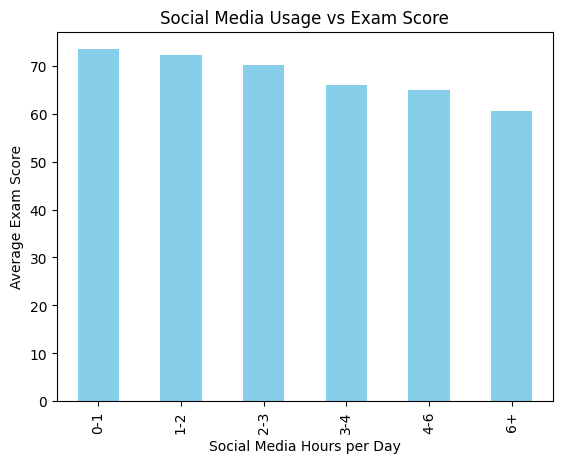

0.12168291063767982


C:\Users\mahay\AppData\Local\Temp\ipykernel_14936\1482218362.py:123: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sleep_scores = df.groupby("sleep_bin")["exam_score"].mean()


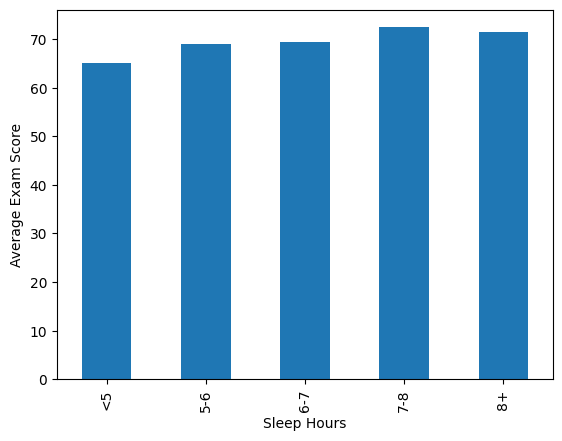

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("student_habits_performance.csv",sep=',',on_bad_lines="warn")
print(df.head())
print(df.tail())

# Does the study time actually improve performance?
# is there any optimal sleep range for better grades or performance?
# How does phone impact academic performance?
# Does attendence correlate performance?
# Which Lifestyle factor affects the grade most?

# Lets see what is the shape(Size) of our dataset?
print(df.shape)

# Lets see Column names of our data set
print(df.columns)

# To check what is the data types 
# we use info method which shows us column_names,data_types,Non_null count,Memory_usage.
print(df.info())

# to see the data types of each column in a dataset
print(df.dtypes)

# lets handle the missing values in data set if any missing values are present
# we will using dropna method
# df.dropna(axis=0,inplace=True)
# print(df)
# After applying dropna method i see the shape(size) of dataset changes that means there are 91 missing value 
# in parental education level there are 91 values are missing means none
print(df.shape)

# by using this df.isna().sum() we found that there are 91 missing values in the column name Parental education level which it can slightly influence the performance of student.
# and assuming something also not correct and accurate here
## print(df.isna().sum())

# so what we do we will fill the missing values with unknown.
df["parental_education_level"]=df["parental_education_level"].fillna("Unknown")
# so finally we fill the missing values(None) with Unknown.
# how i verify that i apply isna method and calculate the total no of missing values and sum that values using .sum()
# after that it is showing 0 means no "none" values are left,all are filled with unknown
print(df.isna().sum())
print(df)

print(df["parental_education_level"].value_counts())

# Does study time affect student performance?
# Is there a relationship between sleep hours and grades?
# How does phone usage impact academic performance?
# Does parental education level influence student results?
# Is attendance correlated with performance?

# Now I want to see how parental education level influence the students results
print(df.groupby("parental_education_level")["exam_score"].mean())
# after applying this I find that the average exam scores are nearly close to each other thats why i dont think that the parental education level influence the exam score that much

## insight:-Parental education level alone shows minimal impact on exam performance
# The score variation accross groups is small,it is suggesting that the outcomes are more  influnced  by student habits and lifestyle factor than parental education 

# Now we will see how the study hours influnce the performance.
print(df.groupby("study_hours_per_day")["exam_score"].mean())

# i found the result 
"""Very low study time=poor and inconsistent performance
scores fluctuate a lot no solid learning base
There is a positive correlation because as study hours increases the score improves
Study more doesn't give more marks after a point.
this means quality+consistency>more hours
"""

# Lets find Correlation.
# 0.0–0.3 → weak
# 0.3–0.6 → moderate
# 0.6+ → strong

# correlaation tells us how strongly two things move together
print(df["study_hours_per_day"].corr(df["exam_score"]))
# The result i get is 0.825
# it means is a strong positive correlation
# Insight:-Students who study more hours tend to score significantly higher marks in exams.

# In todays world,everyone is distracted by social media 
# This is the biggest problem lets see how social media hours influence exam hours.

print(df["social_media_hours"].corr(df["exam_score"]))
# The result of this correlation is -0.1667
# insight:-a weak negative correlation(-0.1667) was observed between social media hours and exam score,It suggest that higher social media use is slightly associated with lower exam score,but the relationship is not strong.

df["social_media_bin"]=pd.cut(
    df["social_media_hours"],
    bins=[0,1,2,3,4,6,10],
    labels=['0-1','1-2','2-3','3-4','4-6','6+']
)

print(df.groupby("social_media_bin")["exam_score"].mean())

# As social media hours increase, average exam score decreases
# Clear negative relationship
# Insight:-Binning social media usage shows a clear decreasing trend in exam performance. Students using social media 0–1 hours/day scored the highest on average (73.46), while heavy users (6+ hours/day) scored the lowest (60.57). This suggests that excessive social media usage is associated with lower exam scores, even though the overall correlation is weak.”



# grouped data
avg_scores = df.groupby('social_media_bin')['exam_score'].mean()

# bar plot
avg_scores.plot(kind='bar', color='skyblue')
plt.xlabel('Social Media Hours per Day')
plt.ylabel('Average Exam Score')
plt.title('Social Media Usage vs Exam Score')
plt.show()


print(df["sleep_hours"].corr(df["exam_score"]))

df["sleep_bin"] = pd.cut(
    df["sleep_hours"],
    bins=[0,5,6,7,8,10],
    labels=['<5','5-6','6-7','7-8','8+']
)

sleep_scores = df.groupby("sleep_bin")["exam_score"].mean()

sleep_scores.plot(kind='bar')
plt.xlabel("Sleep Hours")
plt.ylabel("Average Exam Score")
plt.show()


# Conclusion:

# 1. Study hours show strong positive correlation (0.825) with exam scores.
# 2. Social media usage negatively affects performance.
# 3. Balanced sleep improves results.
# 4. Parental education has minimal impact.

# Overall, student lifestyle habits influence performance more than background factors.

